In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import scipy.stats as st
import random

In [17]:
df= pd.read_csv('nobel prize.csv')
df.head(3)


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1-Jan,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,3/1/1911,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1-Jan,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,9/7/1907,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1-Jan,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,3/31/1917,Marburg,Germany


Does Europe have more organizations with Nobel Prizes?

In [18]:
#Remove rows with no organization
clean_df = df[df['Organization Name'].notna()]


/Users/conorgleason/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


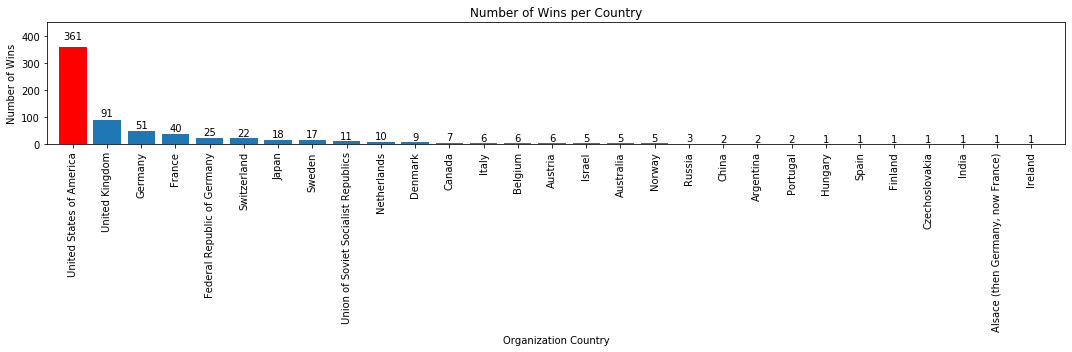

In [48]:
clean_df['Number of Organization Wins'] = ''
bar_pd = clean_df['Organization Country'].value_counts()
x_axis = bar_pd.index.values
y_axis = bar_pd.values
fig, ax = plt.subplots(figsize=(15, 5))
x_pos = [i for i, _ in enumerate(x_axis)]
rects1 = ax.bar(x_pos, y_axis, color='b')

#Label graph and format 
plt.title("Number of Wins per Country")
plt.xlabel("Organization Country")
plt.ylabel("Number of Wins")
barlist = plt.bar(x_axis, y_axis, align='center')
plt.xlim(-0.75, len(x_axis))
plt.xticks(rotation = 90)
plt.ylim(0,450)
def autolabel(rects):
    
    #Attach a text label above each bar displaying its height
    
    for rect in rects:
        height = rect.get_height()
       
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%i' % int(height),
        ha='center', va='bottom')
autolabel(rects1)
x_axis[0] = 'USA'
barlist[0].set_color('red')
plt.tight_layout()
plt.savefig('OrganizationWinsPerCountry.png', dpi=fig.dpi)

plt.show(barlist)
